In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import esutil, scipy
sys.path.append('../')
from utils import *
from cmass_modules import io, Cuts
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from scipy.interpolate import interp1d

In [4]:
zbin,dz = np.linspace(0.0,10., 1001, retstep=True)
zcenter = zbin[:-1]+dz/2.
#Nz = np.column_stack(( zbin[:-1], N1, N2, N3, N4 ))
#np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/zdistris/twomass.nz', Nz)
#Nz = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/twomass.nz')
#Nz_cmass,_ = np.histogram( cmass_spec['Z'], bins=zbin, normed=True)
#Nz_cmass = np.column_stack(( zbin[:-1], Nz_cmass ))

zbin1, Nz_cmass_ngc = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/cmass_ngc.nz', unpack=True)
zbin2, Nz_cmass_sgc = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/cmass_sgc.nz', unpack=True)
Nz_cmass_ngc = scipy.interpolate.interp1d(zbin1+0.005, Nz_cmass_ngc)
Nz_cmass_sgc = scipy.interpolate.interp1d(zbin2+0.005, Nz_cmass_sgc)

#Nz_cmass = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/dmass_ansatz_a0.07.nz')
#N_2mass_all = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/twomass_1bin.nz')

NYU value added catalog 

In [5]:
#nyu_cat = esutil.io.read('/n/des/lee.5922/data/NYU_value_added_cat/object_catalog.fits')
#sdss_spec = esutil.io.read('/n/des/lee.5922/data/NYU_value_added_cat/object_sdss_spectro.fits')
#twomass_spec = esutil.io.read('/n/des/lee.5922/data/NYU_value_added_cat/object_twomass.fits')

In [6]:
#cmass_spec = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz')

In [7]:
import fitsio

In [8]:
dmass_fits = fitsio.FITS('/n/des/lee.5922/data/dmass_cat/dmass_nz/nz.fits')
dmass_cov_fits = fitsio.FITS('/n/des/lee.5922/data/dmass_cat/dmass_nz/nz_with_cov.fits')

In [9]:
dmass_fits


  file: /n/des/lee.5922/data/dmass_cat/dmass_nz/nz.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      wz_full
  2      BINARY_TBL      wz_large
  3      BINARY_TBL      wz_middle
  4      BINARY_TBL      DESDM_ZP
  5      BINARY_TBL      wz_fiducial
  6      BINARY_TBL      wz_small

In [10]:
dmass_fits['wz_fiducial']


  file: /n/des/lee.5922/data/dmass_cat/dmass_nz/nz.fits
  extension: 5
  type: BINARY_TBL
  extname: wz_fiducial
  rows: 36
  column info:
    Z_LOW               f8  
    Z_MID               f8  
    Z_HIGH              f8  
    BIN1                f8  
    BIN_E_1             f8  

In [11]:
dmass_nz_sm = dmass_fits['wz_small'].read()
cov_sm = dmass_cov_fits['cov_wz_small'].read()
z_sm = dmass_nz_sm['Z_MID']
nz_sm = dmass_nz_sm['BIN1']
z_err_sm = dmass_nz_sm['BIN_E_1']

dmass_nz_fid = dmass_fits['wz_fiducial'].read()
cov_fid = dmass_cov_fits['cov_wz_fiducial'].read()
z_fid = dmass_nz_fid['Z_MID']
nz_fid = dmass_nz_fid['BIN1']
z_err_fid = dmass_nz_fid['BIN_E_1']


dmass_desdm = dmass_fits['DESDM_ZP'].read()
desdm_zp = dmass_desdm['Z_MID']
Nz_desdm = dmass_desdm['BIN1']

In [12]:
cov_fid

array([[ 9.07467096e-01,  1.64174658e-01, -5.57188137e-02, ...,
        -4.06029930e-02,  1.00210611e-02,  1.74000557e-02],
       [ 1.64174658e-01,  1.19251060e+00,  7.27958752e-02, ...,
         3.74977227e-02, -1.00351999e-01,  4.06649652e-02],
       [-5.57188137e-02,  7.27958752e-02,  1.13360130e+00, ...,
        -1.08023665e-02, -8.84363190e-02, -2.25405361e-02],
       ...,
       [-4.06029930e-02,  3.74977227e-02, -1.08023665e-02, ...,
         1.78356103e-01, -2.83685777e-04, -1.38639189e-02],
       [ 1.00210611e-02, -1.00351999e-01, -8.84363190e-02, ...,
        -2.83685777e-04,  2.10420488e-01,  5.44187073e-02],
       [ 1.74000557e-02,  4.06649652e-02, -2.25405361e-02, ...,
        -1.38639189e-02,  5.44187073e-02,  2.16735877e-01]])

In [13]:
dmass_cov_fits['wz_fiducial'].read()

array([( 0.19406319, 0.17, 0.9526107 ), (-0.20733142, 0.19, 1.0920213 ),
       ( 0.17214876, 0.21, 1.0647072 ), ( 0.52376646, 0.23, 0.962866  ),
       (-0.08667973, 0.25, 0.76324666), ( 0.17665057, 0.27, 0.8848988 ),
       ( 1.2651124 , 0.29, 0.7737581 ), (-0.07938112, 0.31, 0.7013972 ),
       ( 0.15302813, 0.33, 0.6813875 ), ( 0.8491412 , 0.35, 0.64294654),
       ( 1.2866561 , 0.37, 0.68214136), ( 1.630696  , 0.39, 0.66341746),
       ( 1.2782414 , 0.41, 0.5546089 ), ( 1.4971707 , 0.43, 0.61940753),
       ( 2.4354732 , 0.45, 0.6551364 ), ( 3.361978  , 0.47, 0.8524688 ),
       ( 4.2891493 , 0.49, 0.8150369 ), ( 4.1496415 , 0.51, 0.82860893),
       ( 4.566733  , 0.53, 0.9265461 ), ( 3.159331  , 0.55, 0.7672862 ),
       ( 3.8928685 , 0.57, 0.668108  ), ( 3.9961226 , 0.59, 0.65535855),
       ( 3.6669898 , 0.61, 0.7248827 ), ( 2.9616363 , 0.63, 0.5798135 ),
       ( 1.701247  , 0.65, 0.50848293), ( 0.7688724 , 0.67, 0.5046755 ),
       ( 1.15685   , 0.69, 0.5412993 ), ( 1.0959333

In [16]:
dmass_cat = fitsio.read('/n/des/lee.5922/data/dmass_cat/dmass_spt.fits')

In [27]:
help(ax.errorbar)

Help on method errorbar in module matplotlib.axes._axes:

errorbar(ax, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot an errorbar graph.
    
    Plot x versus y with error deltas in yerr and xerr.
    Vertical errorbars are plotted if yerr is not None.
    Horizontal errorbars are plotted if xerr is not None.
    
    x, y, xerr, and yerr can all be scalars, which plots a
    single error bar at x, y.
    
    Parameters
    ----------
    x : scalar or array-like
    y : scalar or array-like
    
    xerr/yerr : scalar or array-like, shape(N,) or shape(2,N), optional
        If a scalar number, len(N) array-like object, or a N-element
        array-like object, errorbars are drawn at +/-value relative
        to the data. Default is None.
    
        If a sequence of shape 2xN, errorbars are drawn at -row1
        and +row2 relative to the data.
    
    fmt : plot format string, optional, default: None
        The plot format symbol. If fmt is 'n

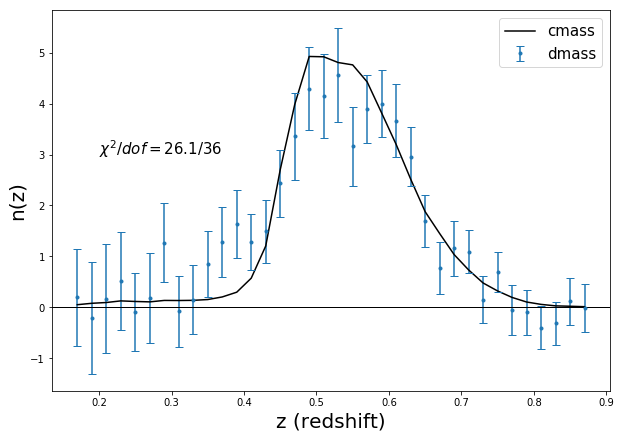

In [44]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k--', label='ngc')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label='cmass')
#ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='.', capsize=4, label='dmass')
ax.text(0.2, 3., r'$\chi^2/dof = 26.1/36$', fontsize=15)
#ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='.', label='small (0.1-0.5Mpc)')
#ax.text(0.2, 2.5, r'$\chi^2/dof=94.4/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 15)

ax.set_xlabel('z (redshift)', fontsize=20)
ax.set_ylabel('n(z)', fontsize=20)

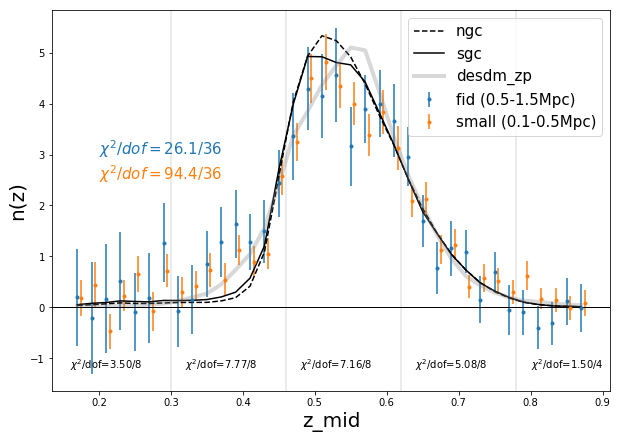

In [256]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k--', label='ngc')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label='sgc')
ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='.', label='fid (0.5-1.5Mpc)')
ax.text(0.2, 3., r'$\chi^2/dof = 26.1/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='.', label='small (0.1-0.5Mpc)')
ax.text(0.2, 2.5, r'$\chi^2/dof=94.4/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 15)

ax.axvline( x = 0.31-0.01, color = 'k', alpha = 0.1)
ax.text(0.31-0.15, -1.2, '$\chi^2$/dof=3.50/8')
ax.axvline( x = 0.47-0.01, color = 'k', alpha = 0.1)
ax.text(0.47-0.15, -1.2, '$\chi^2$/dof=7.77/8')
ax.axvline( x = 0.63-0.01, color = 'k', alpha = 0.1)
ax.text(0.63-0.15, -1.2, '$\chi^2$/dof=7.16/8')
ax.axvline( x = 0.79-0.01, color = 'k', alpha = 0.1)
ax.text(0.79-0.15, -1.2, '$\chi^2$/dof=5.08/8')
ax.text(0.95-0.15, -1.2, '$\chi^2$/dof=1.50/4')

ax.set_xlabel('z_mid', fontsize=20)
ax.set_ylabel('n(z)', fontsize=20)

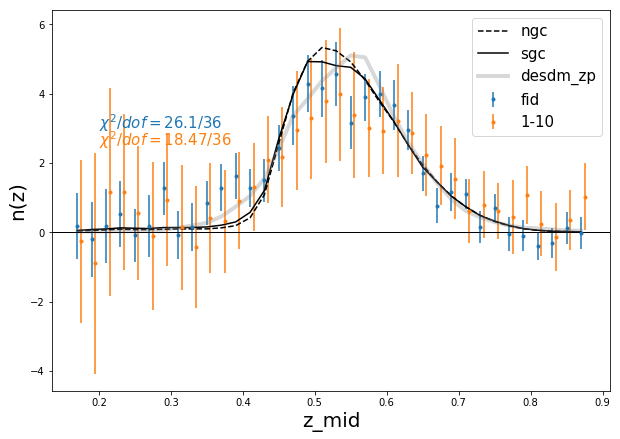

In [245]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k--', label='ngc')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label='sgc')
ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='.', label='fid')
ax.text(0.2, 3., r'$\chi^2/dof = 26.1/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='.', label='1-10')
ax.text(0.2, 2.5, r'$\chi^2/dof=18.47/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 15)


ax.set_xlabel('z_mid', fontsize=20)
ax.set_ylabel('n(z)', fontsize=20)

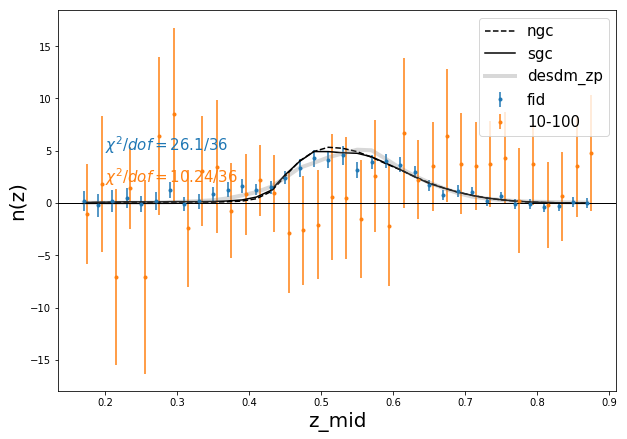

In [250]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k--', label='ngc')
ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label='sgc')
ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid, yerr=z_err_fid, fmt='.', label='fid')
ax.text(0.2, 5., r'$\chi^2/dof = 26.1/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.errorbar(z_sm+0.005, nz_sm, yerr=z_err_sm, fmt='.', label='10-100')
ax.text(0.2, 2, r'$\chi^2/dof=10.24/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 15)


ax.set_xlabel('z_mid', fontsize=20)
ax.set_ylabel('n(z)', fontsize=20)

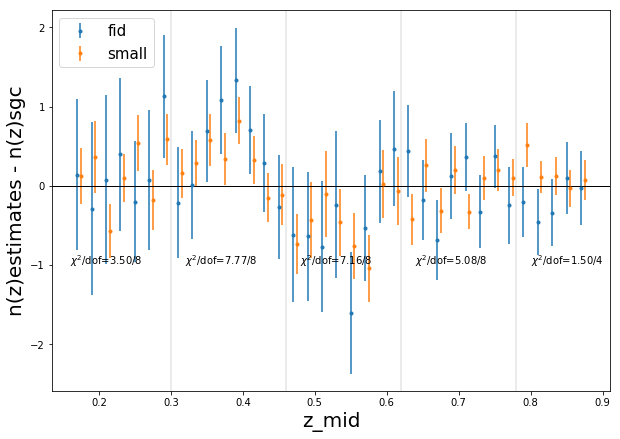

In [226]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.plot(z_fid, Nz_cmass_ngc(z_fid), 'k--', label='ngc')
#ax.plot(z_fid, Nz_cmass_sgc(z_fid), 'k-', label='sgc')
#ax.plot(desdm_zp, Nz_desdm, '-', color='grey', label='desdm_zp', linewidth=4, alpha = 0.3)

ax.errorbar(z_fid, nz_fid-Nz_cmass_sgc(z_fid), yerr=z_err_fid, fmt='.', label='fid')
#ax.text(0.2, 3., r'$\chi^2/dof = 26.1/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.errorbar(z_sm+0.005, nz_sm-Nz_cmass_sgc(z_fid), yerr=z_err_sm, fmt='.', label='small')
#ax.text(0.2, 2.5, r'$\chi^2/dof=94.4/36$', fontsize=15, color = ax.lines[-1].get_color())
ax.axhline(y=0, color='k', linewidth = 1)
#ax.set_xlim(0.1,0.9)
ax.legend(fontsize = 15)

ax.axvline( x = 0.31-0.01, color = 'k', alpha = 0.1)
ax.text(0.31-0.15, -1., '$\chi^2$/dof=3.50/8')
ax.axvline( x = 0.47-0.01, color = 'k', alpha = 0.1)
ax.text(0.47-0.15, -1., '$\chi^2$/dof=7.77/8')
ax.axvline( x = 0.63-0.01, color = 'k', alpha = 0.1)
ax.text(0.63-0.15, -1., '$\chi^2$/dof=7.16/8')
ax.axvline( x = 0.79-0.01, color = 'k', alpha = 0.1)
ax.text(0.79-0.15, -1., '$\chi^2$/dof=5.08/8')
ax.text(0.95-0.15, -1., '$\chi^2$/dof=1.50/4')

ax.set_xlabel('z_mid', fontsize=20)
ax.set_ylabel('n(z)estimates - n(z)sgc', fontsize=20)

In [248]:
from numpy.linalg import inv
def chisqr( d1, d2, cov ):
    diffv = d1 - d2
    chi2= np.dot(diffv, np.dot(inv(cov), diffv.T) )
    return chi2

print chisqr(nz_fid, Nz_cmass_sgc(z_fid), cov_fid)#/nz_fid.size
print chisqr(nz_sm, Nz_cmass_sgc(z_sm), cov_sm)#/nz_sm.size

26.074573313572188
10.24118029381427


In [228]:
for i in range(5):
    print 'z range  {}-{}'.format(z_fid[8*i:8*(i+1)][0],z_fid[8*i:8*(i+1)][-1]), '  ',
    chi = chisqr(nz_fid[8*i:8*(i+1)], Nz_cmass_sgc(z_fid)[8*i:8*(i+1)], cov_fid[8*i:8*(i+1), 8*i:8*(i+1)])#/nz_fid.size
    print 'chi2/dof = {:0.2f}/{}'.format(chi, nz_fid[8*i:8*(i+1)].size)

z range  0.17-0.31    chi2/dof = 3.50/8
z range  0.33-0.47    chi2/dof = 7.77/8
z range  0.49-0.63    chi2/dof = 7.16/8
z range  0.65-0.79    chi2/dof = 5.08/8
z range  0.81-0.87    chi2/dof = 1.50/4


In [ ]:

chisqr(nz_fid[9*i:9*(i+1)], Nz_cmass_sgc(z_fid)[9*i:9*(i+1)], cov_fid[9*i:9*(i+1), 9*i:9*(i+1)])#/nz_fid.size

In [91]:
#Nz = np.column_stack(( zbin[:-1], N1, N2, N3, N4 ))
#np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/zdistris/twomass.nz', Nz)
#Nz_cmass = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/zdistris/cmass_ngc.nz')

Nz_cmass04,_ = np.histogram( cmass_spec['Z'], bins=np.linspace(0,0.4, 41) , normed=True)
#Nz_cmass = np.column_stack(( zbin[:-1], Nz_cmass ))
#np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/zdistris/cmass_ngc.nz', Nz_cmass)

#zbin = np.linspace(0,10.0, 1001)
#Nz_dmass_bestfit = Pnz_dmass(zcenter,1 ,A=0.1)
#Nz_dmass = np.column_stack(( zbin[:-1], Nz_dmass_bestfit ))
#np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/dmass_ansatz_a0.07.nz', Nz_dmass)



#Nz_cmass_sgc,_ = np.histogram( cmass_spec['Z'], bins=zbin, normed=True)
#Nz_cmass = np.column_stack(( zbin[:-1], Nz_cmass_sgc ))
#np.savetxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/zdistris/cmass_sgc.nz', Nz_cmass)
